# Zameen.com Data Scraping

Steps:

Data Collection: Create a web scraper to extract property listings and details from the target real estate website.
    
Data Cleaning: Clean and preprocess the scraped data, handle missing values, and ensure data consistency.
    
Data Storage: Save the cleaned data in a structured format, such as a CSV or a database.
    
Data Analysis: Perform basic exploratory data analysis to gain insights into the collected property data.

Deployment: Provide the client with the scraped and cleaned dataset, along with the web scraper code.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

# Data Collection

In [ ]:
url = "https://www.zameen.com/"

response = requests.get(url)
doc = BeautifulSoup(response.text)

In [ ]:
ul_tags = doc.find_all("ul", {"class": "_22762832 e1d5c7a7"})

all_links = []
for ul in ul_tags:
    link_tags = ul.find_all('a')
    for i in range(len(link_tags)-2):
        all_links.append(link_tags[i].get('href'))

In [ ]:
data = []

for link in all_links:
    response = requests.get(f"https://www.zameen.com{link}")
    document = BeautifulSoup(response.text)

    properties_li = document.find_all(attrs={"role": "article"})

    for li in properties_li:
        listing = {
            "price": "",
            "location": "",
            "beds": "",
            "baths": "",
            "area": "",
            "title": "",
            "created_at": ""
        }
        if li.find(attrs={"aria-label":"Price"}):
            listing['price'] = li.find(attrs={"aria-label":"Price"}).text
            
        if li.find(attrs={"aria-label":"Location"}):
            listing['location'] = li.find(attrs={"aria-label":"Location"}).text
        
        if li.find(attrs={"aria-label":"Beds"}):
            listing['beds'] = li.find(attrs={"aria-label":"Beds"}).text
            
        if li.find(attrs={"aria-label":"Baths"}):
            listing['baths'] = li.find(attrs={"aria-label":"Baths"}).text
            
        if li.find(attrs={"aria-label":"Area"}):
            listing['area'] = li.find(attrs={"aria-label":"Area"}).text
        
        if li.find(attrs={"aria-label":"Title"}):
            listing['title'] = li.find(attrs={"aria-label":"Title"}).text
           
        if li.find(attrs={"aria-label":"Listing creation date"}):
            listing['created_at'] = li.find(attrs={"aria-label":"Listing creation date"}).text
        data.append(listing)
            
data

In [35]:
len(data)

886

# Data Storing to CSV File

In [40]:
data_df = pd.DataFrame(data)
data_df.to_csv("property_data.csv")

# Read Data from .csv

In [5]:
listing_df = pd.read_csv("property_data.csv", index_col=0)

In [6]:
listing_df.head()

,price,location,beds,baths,area,title,created_at
0,11.75 Crore,"DHA Phase 6, DHA Defence",5.0,6.0,1 Kanal,1-Kanal Brand New Modern Most Luxurious Fully ...,Added: 12 minutes ago
1,35 Crore,"DHA Phase 6, DHA Defence",5.0,6.0,2 Kanal,2-kanal Brand New Facing Park Most Luxurious F...,Added: 12 minutes ago
2,65 Crore,"DHA Phase 7, DHA Defence",5.0,6.0,5 Kanal,5 Kanal Fully Furnished Brand New Classical Sp...,Added: 22 minutes ago
3,7.12 Crore,"DHA Phase 6, DHA Defence",5.0,6.0,1 Kanal,Magnificent 1 Kanal Ultra spainsh Brand New Lu...,Added: 34 minutes ago
4,2.05 Crore,"DHA 9 Town, DHA Defence",3.0,4.0,5 Marla,Corner House For Sale In Dha Lahore Near To Pa...,Added: 49 minutes ago


# Preprocess and Clean Data

In [7]:
# convert prices to number
def convertPrice(price):
    if price.endswith("Crore"):
        return float("11.75 Crore".replace('Crore', '').strip()) * 10000000
    elif price.endswith("Lakh"):
        return float("11.75 Lakh".replace('Lakh', '').strip()) * 100000
    elif price.endswith("Thousand"):
        return float("11.75 Lakh".replace('Lakh', '').strip()) * 1000

listing_df['price_pkr'] = listing_df['price'].apply(convertPrice)

In [8]:
listing_df.head(2)

,price,location,beds,baths,area,title,created_at,price_pkr
0,11.75 Crore,"DHA Phase 6, DHA Defence",5.0,6.0,1 Kanal,1-Kanal Brand New Modern Most Luxurious Fully ...,Added: 12 minutes ago,117500000.0
1,35 Crore,"DHA Phase 6, DHA Defence",5.0,6.0,2 Kanal,2-kanal Brand New Facing Park Most Luxurious F...,Added: 12 minutes ago,117500000.0


In [9]:
listing_df.isna().sum()

price           0
location        0
beds          105
baths         111
area           45
title           0
created_at      0
price_pkr       0
dtype: int64

In [10]:
listing_df['beds'].fillna(listing_df['beds'].mode()[0], inplace=True)
listing_df['baths'].fillna(listing_df['baths'].mode()[0], inplace=True)
listing_df['area'].fillna(listing_df['area'].mode()[0], inplace=True)

In [11]:
listing_df.isna().sum()

price         0
location      0
beds          0
baths         0
area          0
title         0
created_at    0
price_pkr     0
dtype: int64

# Data Visualizations

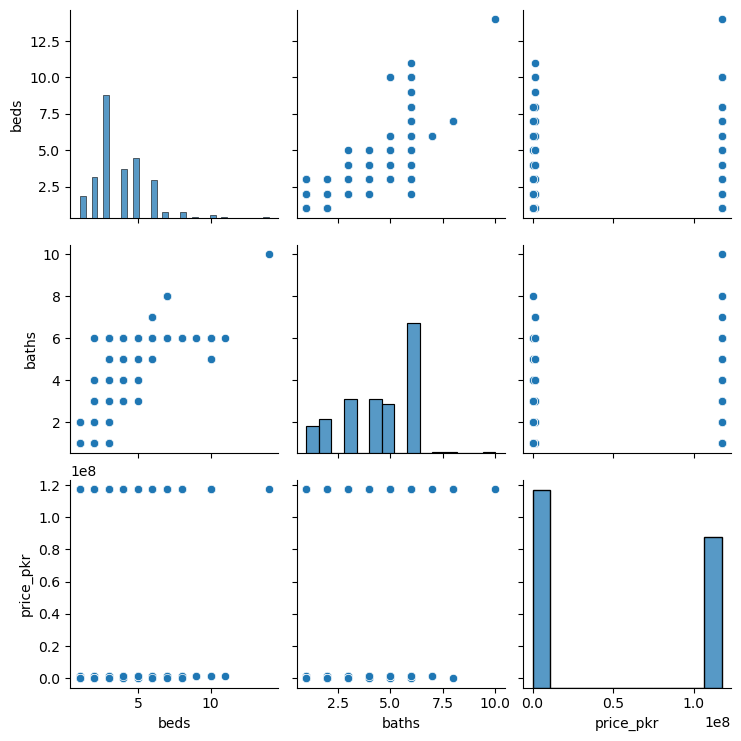

In [12]:
sns.pairplot(listing_df)

In [18]:
# top 10 expensive plots
top_10_expensive = listing_df.sort_values(by='price_pkr', ascending=False).head(5)
top_10_expensive

,price,location,beds,baths,area,title,created_at,price_pkr
0,11.75 Crore,"DHA Phase 6, DHA Defence",5.0,6.0,1 Kanal,1-Kanal Brand New Modern Most Luxurious Fully ...,Added: 12 minutes ago,117500000.0
270,1.22 Crore,"DHA Defence - Villa Community, DHA Defence",3.0,3.0,6 Marla,This Is Your Chance To Buy House In Bahawalpur,Added: 17 hours ago,117500000.0
281,1.45 Crore,"Gulfam Town Society, Abbottabad",3.0,3.0,7 Marla,7 Marla Single Storey House,Added: 1 day ago,117500000.0
279,1.2 Crore,"Officers Colony, Abbottabad",3.0,3.0,5 Marla,Single Storey House For Sale In Officer Colony...,Added: 37 minutes ago,117500000.0
278,3.3 Crore,"Nawansher, Abbottabad",3.0,6.0,10 Marla,Triple Storey House For Sale In Kohsar Town Ab...,Added: 2 weeks ago,117500000.0


<Axes: xlabel='baths', ylabel='count'>

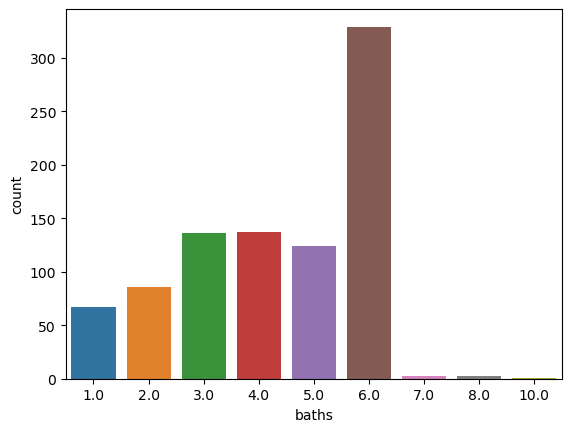

In [24]:
sns.countplot(listing_df, x='baths')

<Axes: xlabel='beds', ylabel='count'>

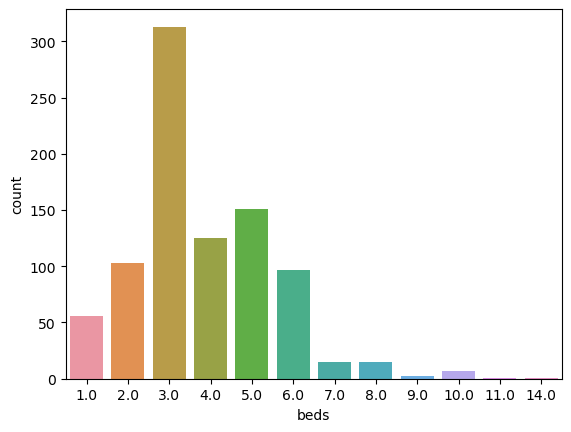

In [26]:
sns.countplot(listing_df, x='beds')

# Deployment